In [1]:
%%time
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd
scalingFactor = 200
rxndiff=dict()

print('Starting scaling = ', scalingFactor)
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}


#Growth rate = 3.0
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

gr_sim = dict()

data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor, NR_scaling = NR_scaledrates)
    gr_sim[i] = (CellLatencies(sim_i))

data = "191105_0908/"
for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor, NR_scaling = NR_scaledrates)
    gr_sim[i] = (CellLatencies(sim_i))


gr_dict = {'gr_1':gr_sim}

def computedElongationLatency_gr3_v2(gr25_ptRNA,gr25_pCodon,gr_dict):
    import numpy as np

    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff],[rxndiff[d][5][0] for d in rxndiff])

Starting scaling =  200
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 1min, sys: 716 ms, total: 1min
Wall time: 1min 1s


In [605]:
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))
pCodon_uniform = np.ones(len(gr25_pCodon))/sum(np.ones(len(gr25_pCodon)))
elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,pCodon_uniform,gr_dict)
print(elong_t)

[211.818640298573]


In [606]:
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))
pCodon_uniform = np.ones(len(gr25_pCodon))/sum(np.ones(len(gr25_pCodon)))
elong_t, std = computedElongationLatency_gr3_v2(gr25_ptRNA,pCodon_uniform,gr_dict)
print(elong_t)

[206.8949870205005]


In [607]:
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))
pCodon_uniform = np.ones(len(gr25_pCodon))/sum(np.ones(len(gr25_pCodon)))
elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,gr25_pCodon,gr_dict)
print(elong_t)

[210.9215183490339]


In [238]:
#### tRNA shuffling

from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd

elong_t_tRNA_list = list()
p_tRNA_list = list()
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)


for i in range(100):
    ptRNA_uniform = np.random.uniform(min(gr25_ptRNA),max(gr25_ptRNA),len(gr25_ptRNA))
    elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,gr25_pCodon,gr_dict);
    elong_t_tRNA_list.append(elong_t[0])
    p_tRNA_list.append(ptRNA_uniform)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


211.0440855767139 4.078545696247915
z-score:  6.042370838062546
p-value 7.593295686406417e-10


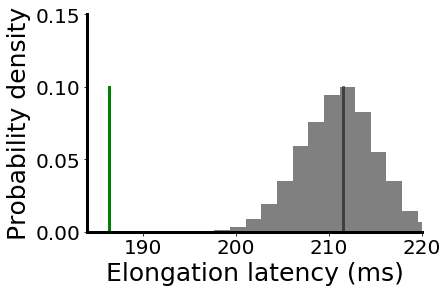

In [76]:
#### Plot tRNA shuffling
import matplotlib.pyplot as plt
import scipy.stats

p_tRNA_list=np.load('RandomtRNA_FixedCodon_10ksample_p_Codon_tRNA_list.npy')
elong_t_tRNA_list=np.load('RandomtRNA_FixedCodon_10ksample_elong_t_list.npy')

fig,ax = plt.subplots(1,1)
hist=ax.hist(elong_t_tRNA_list,20,color='grey',density=True)
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green')
ax.plot([211.5]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='black',alpha=0.5)

print(np.mean(elong_t_tRNA_list), np.std(elong_t_tRNA_list))
print('z-score: ', (np.mean(elong_t_tRNA_list)-186.4)/np.std(elong_t_tRNA_list))
print('p-value', scipy.stats.norm.sf(abs((np.mean(elong_t_tRNA_list)-186.4)/np.std(elong_t_tRNA_list))))
for _,axes in enumerate([ax]):
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    axes.spines['top'].set_linewidth(0)
    axes.spines['right'].set_linewidth(0)
    axes.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylim(0,0.15)
    ax.set_xlim(184,220)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability density',size=25)

In [73]:
#### codon shuffling
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd

elong_t_list_codon_distrib = list()
p_Codon_list = list()
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

for i in range(100):
    pCodon_uniform = np.random.uniform(min(gr25_Codon),max(gr25_Codon),len(gr25_Codon))
    elong_t, std = computedElongationLatency_gr3_v2(gr25_ptRNA,pCodon_uniform,gr_dict);
    elong_t_list_codon_distrib.append(elong_t[0])
    p_Codon_list.append(pCodon_uniform)
#np.save('FixedtRNA_RandomCodon_100sample_elong_t_list',elong_t_list_codon_distrib )
#np.save('FixedtRNA_RandomCodon_100sample_p_Codon_list',p_Codon_list )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


KeyboardInterrupt: 

206.291144758029 2.971071979444303
z-score:  6.694938694063327
p-value 1.0788103352318097e-11


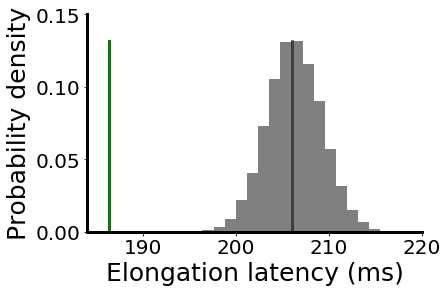

In [74]:
#### Plot codon shuffling
import matplotlib.pyplot as plt


p_tRNA_list=np.load('FixedtRNA_RandomCodon_10ksample_p_Codon_tRNA_list.npy')
elong_t_list_codon_distrib=np.load('FixedtRNA_RandomCodon_10ksample_elong_t_list.npy')
fig,ax = plt.subplots(1,1)
hist = ax.hist(elong_t_list_codon_distrib,color='grey', bins=20,density=True)
#hist = np.histogram(elong_t_list_codon_distrib,bins=20)
#ax.bar(hist[1][0:-1],hist[0]/sum(hist[0]),align='edge')
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green')
ax.plot([206]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='black',alpha=0.5)
print(np.mean(elong_t_list_codon_distrib), np.std(elong_t_list_codon_distrib))
print('z-score: ', (np.mean(elong_t_list_codon_distrib)-186.4)/np.std(elong_t_list_codon_distrib))
print('p-value', scipy.stats.norm.sf(abs((np.mean(elong_t_list_codon_distrib)-186.4)/np.std(elong_t_list_codon_distrib))))


for _,axes in enumerate([ax]):
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    axes.spines['top'].set_linewidth(0)
    axes.spines['right'].set_linewidth(0)
    axes.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylim(0,0.15)
    ax.set_xlim(184,220)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability density',size=25)

In [668]:
#### tRNA & codon shuffling
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd

elong_t_list_codon_tRNA_distrib = list()
p_tRNA_list = list()
p_Codon_list = list()
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
#combined_arr_list = list()
for i in range(100):
    pCodon_uniform = np.random.uniform(min(gr25_Codon),max(gr25_Codon),len(gr25_Codon))
    ptRNA_uniform = np.random.uniform(min(gr25_ptRNA),max(gr25_ptRNA),len(gr25_ptRNA))
    elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,pCodon_uniform,gr_dict);
    elong_t_list_codon_tRNA_distrib.append(elong_t[0])
    p_tRNA_list.append(ptRNA_uniform)
    p_Codon_list.append(pCodon_uniform)
    #combined_arr_list.append(np.append(np.array(ptRNA_uniform),np.array(pCodon_uniform)))

np.save('RandomtRNA_RandomCodon_100sample_elong_t_list',elong_t_list_codon_tRNA_distrib )
np.save('RandomtRNA_RandomCodon_100sample_p_Codon_list',p_Codon_list )
np.save('RandomtRNA_RandomCodon_100sample_p_tRNA_list',p_tRNA_list )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


211.0583048364164 2.919491235038141
z-score:  8.446096546028592
p-value 1.506023124227507e-17


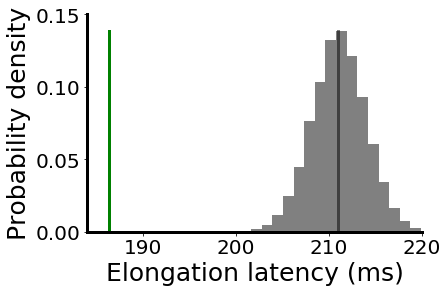

In [75]:
#### Plot tRNA+codon shuffling
import matplotlib.pyplot as plt


elong_t_list_codon_tRNA_distrib=np.load('RandomtRNA_RandomCodon_10ksample_elong_t_list.npy')
fig,ax = plt.subplots(1,1)
hist=ax.hist(elong_t_list_codon_tRNA_distrib,20,color='grey',density=True)
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green')
ax.plot([211]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='black',alpha=0.5)

print(np.mean(elong_t_list_codon_tRNA_distrib), np.std(elong_t_list_codon_tRNA_distrib))
print('z-score: ', (np.mean(elong_t_list_codon_tRNA_distrib)-186.4)/np.std(elong_t_list_codon_tRNA_distrib))
print('p-value', scipy.stats.norm.sf(abs((np.mean(elong_t_list_codon_tRNA_distrib)-186.4)/np.std(elong_t_list_codon_tRNA_distrib))))




for _,axes in enumerate([ax]):
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    axes.spines['top'].set_linewidth(0)
    axes.spines['right'].set_linewidth(0)
    axes.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylim(0,0.15)
    ax.set_xlim(184,220)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability density',size=25)

In [31]:
import scipy.stats

#find p-value
scipy.stats.norm.sf((np.mean(elong_t_list_codon_tRNA_distrib)-186.4)/np.std(elong_t_list_codon_tRNA_distrib))

1.506023124227507e-17

In [455]:
###### Genetic algorithm for just tRNA shuffling ########

def run_ga_matchtRNA(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,mintRNA,maxtRNA,p_tRNA_list_ref):
    #### Compute fitness
    fitness = [sum(np.abs(p_tRNA_list[i] - p_tRNA_list_ref)) for i in np.arange(len(p_tRNA_list))]

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[-n:]
    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[:n]


    p_tRNA_list=np.array(p_tRNA_list)
    parents = p_tRNA_list[parent_indices]
    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])

        #### Compute elong_t of the recombined children
        elong_t_0, std_0 = computedElongationLatency_gr3_v2(child_0,gr25_pCodon,gr_dict);
        elong_t_1, std_1 = computedElongationLatency_gr3_v2(child_1,gr25_pCodon,gr_dict);
                

        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        recombined_children_elongt.append(elong_t_0[0])
        recombined_children_elongt.append(elong_t_1[0])

    #### Have recombined children and their elong_t replaced culled candidates
    p_tRNA_list[cull_indices] = recombined_children
    elong_t_tRNA_list[cull_indices] = recombined_children_elongt
    return fitness, p_tRNA_list, elong_t_tRNA_list

    

In [456]:
%%time
### Codon array fixed
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_elong_t_list.npy')
p_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list.npy')

fitness_arr = list()
minelong_arr = list()
for i in range(500):
    fitness, p_tRNA_list, elong_t_tRNA_list = run_ga_matchtRNA(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA),gr25_ptRNA)
    print(min(fitness))
    print(min(elong_t_tRNA_list))
    fitness_arr.append(min(fitness))
    minelong_arr.append(min(elong_t_tRNA_list))
#np.save('RandomtRNA_FixedCodon_500sample_optimizesame_elong_t_list2',elong_t_tRNA_list)
#np.save('RandomtRNA_FixedCodon_500sample_optimizesame_p_tRNA_list2',p_tRNA_list)
#np.save('minelong_arr2_dist',minelong_arr)
#np.save('min_fitness_dist',minelong_arr)

0.9651750845795982
200.67902537722506
0.614272532943319
200.67902537722506
0.614272532943319
199.75506614512028
0.614272532943319
199.75506614512028
0.5458408218395132
199.75506614512028
0.5458408218395132
199.75506614512028
0.5458408218395132
199.75506614512028
0.5458408218395132
200.36874919702345
0.5458408218395132
198.10627444132865
0.5249235820239201
198.10627444132865
0.5225466884467268
197.93816967753222
0.5173133108059933
197.93816967753222
0.5173133108059933
197.93816967753222
0.5173133108059933
197.93816967753222
0.5173133108059933
197.54378730549556
0.5130816094141721
197.54378730549556
0.5130816094141721
197.54378730549556
0.46966655828465714
196.8909266394599
0.46966655828465714
197.54378730549556
0.46966655828465714
197.54378730549556
0.46966655828465714
197.54378730549556
0.46966655828465714
197.54378730549556
0.46966655828465714
193.30006069469817
0.40906393984665873
193.30006069469817
0.40743027156875833
193.30006069469817
0.4019416043474118
193.13711165244774
0.393993

0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16110561179807065
183.47965555681978
0.16110561179807065
183.47965555681978
0.16110561179807065
183.47965555681978
0.16110561179807065
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.1184022257663
0.155002827948722
183.34593825736454
0.14410

0.09925524057699821
183.01654249726678
0.09925524057699821
183.01654249726678
0.09925524057699821
183.01654249726678
0.09925524057699821
183.01654249726678
0.09925524057699821
183.01654249726678
0.09761517421946345
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
181.99603910989865
0.09563324066429191
183.01654249726678
0.09563324066429191
182.9510436708226
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09239908230116572
183.01654249726678
0.09239908230116572
183.01654249726678
0.09239908230116572
183.01654249726678
0.09239908230116572
183.01654249726678
0.09239908230116572
183.01

[0.0608828  0.01065449 0.07458143 0.00608828 0.01065449 0.00608828
 0.02130898 0.04414003 0.02130898 0.01217656 0.01826484 0.08523592
 0.03196347 0.07305936 0.01217656 0.07153729 0.06392694 0.01674277
 0.00913242 0.02739726 0.01065449 0.0304414  0.01369863 0.0152207
 0.00761035 0.01065449 0.00761035 0.00304414 0.02130898 0.00456621
 0.01674277 0.01217656 0.00152207 0.00913242 0.01674277 0.01978691
 0.0152207  0.02739726 0.05936073 0.01978691]
[0.06123242 0.00981629 0.07746874 0.00722197 0.01780526 0.00479623
 0.02162919 0.04561267 0.02318606 0.01254851 0.01790484 0.08210164
 0.03170865 0.07682706 0.01538411 0.06779926 0.06058516 0.01423384
 0.01505342 0.02627364 0.00996699 0.03217424 0.0045351  0.01276812
 0.00783409 0.01432301 0.00957376 0.00300967 0.0184787  0.00887799
 0.01360292 0.00850082 0.00307484 0.00831545 0.01858219 0.01889345
 0.01124671 0.03083386 0.06054346 0.01567569]
normed tRNA dist  0.09674264424755832
[ 3.49616348e-04 -8.38201657e-04  2.88730560e-03  1.13369001e-03
  

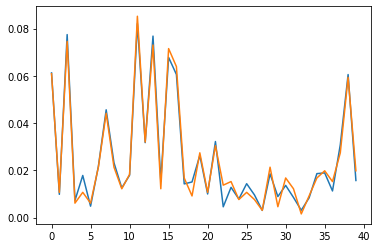

In [460]:
#plot frequency of tRNA vs. codon frequency plot for the new tRNA set vs old -- any new trends?
#validate genetic algorithm by optimizing for 0 distance w/ old set.
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
p_tRNA_list=np.load('RandomtRNA_FixedCodon_500sample_optimizesame_p_tRNA_list.npy')
elong_t_tRNA_list=np.load('RandomtRNA_FixedCodon_500sample_optimizesame_elong_t_list.npy')


print(gr25_ptRNA)
print(p_tRNA_list[np.argmin(elong_t_tRNA_list)])

plt.plot(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)])
plt.plot(np.arange(40),gr25_ptRNA)

tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)

tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)
print(tRNA_dist)
print(sum(tRNA_dist))
print(np.min(elong_t_tRNA_list))

##I might have just shown that a greedy evolutionary search leads to 
## what's seen in cells, whereas a global search leads to deeper minima.
## I should run this for 1500 too, and also i need to measure the slope
## of both elong time and fitness w/ epoch --> supp fig or main fig.
# Or maybe this is just a control, since greedy is expected here?

In [2]:
###### Genetic algorithm for just tRNA shuffling ########

def run_ga(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,mintRNA,maxtRNA):
    
    #### Compute fitness
    fitness = (1/np.array(elong_t_tRNA_list))/sum((1/np.array(elong_t_tRNA_list)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[-n:]
    p_tRNA_list=np.array(p_tRNA_list)
    parents = p_tRNA_list[parent_indices]

    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])

        #### Compute elong_t of the recombined children
        elong_t_0, std_0 = computedElongationLatency_gr3_v2(child_0,gr25_pCodon,gr_dict);
        elong_t_1, std_1 = computedElongationLatency_gr3_v2(child_1,gr25_pCodon,gr_dict);
                

        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        recombined_children_elongt.append(elong_t_0[0])
        recombined_children_elongt.append(elong_t_1[0])

    #### Have recombined children and their elong_t replaced culled candidates
    p_tRNA_list[cull_indices] = recombined_children
    elong_t_tRNA_list[cull_indices] = recombined_children_elongt
    return fitness, p_tRNA_list, elong_t_tRNA_list

    

In [3]:
###### Genetic algorithm for just tRNA shuffling ########

def run_ga_tRNASweep_multithread(codon_arr,elong_arr,tRNA_arr,gr_dict,minRange,maxRange):
    import gc
    from joblib import Parallel, delayed
    import multiprocessing   
    num_cores = 16

    #### Compute fitness
    fitness = (1/np.array(elong_arr))/sum((1/np.array(elong_arr)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    parent_indices = np.argpartition(fitness, n)[-n:]
    tRNA_arr=np.array(tRNA_arr)
    parents = tRNA_arr[parent_indices]

    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])
        
        ### Add children to list
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        
    #### Compute elong_t of the recombined children, multithreaded
    inputs=[[recombined_children[i],codon_arr,gr_dict] for i in np.arange(len(couples)*2)]
    a = Parallel(n_jobs=num_cores,backend='loky')(delayed(computedElongationLatency_gr3_v2_multithread)(i) for i in inputs)
    for _,items in enumerate(a):
        recombined_children_elongt.append(items[0][0])
#    del(a)
#    gc.collect()
    
    #### Have recombined children and their elong_t replaced culled candidates
    tRNA_arr[cull_indices] = recombined_children
    elong_arr[cull_indices] = recombined_children_elongt
    return fitness, tRNA_arr, elong_arr

def computedElongationLatency_gr3_v2_multithread(input):
    import numpy as np
    gr25_ptRNA = input[0]
    gr25_pCodon = input[1]
    gr_dict = input[2]
    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff],[rxndiff[d][5][0] for d in rxndiff])

In [11]:
%%time
### Codon array fixed
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_elong_t_list.npy')
p_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list.npy')


fitness_arr = list()
minelong_arr = list()
for i in range(1500):
    fitness, p_tRNA_list, elong_t_tRNA_list = run_ga_tRNASweep_multithread(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA))
    print(max(fitness))
    print(min(elong_t_tRNA_list))
    fitness_arr.append(max(fitness))
    minelong_arr.append(min(elong_t_tRNA_list))
#np.save('RandomtRNA_FixedCodon_1500sample_elong_t_list2',elong_t_tRNA_list)
#np.save('RandomtRNA_FixedCodon_1500sample_p_tRNA_list2',p_tRNA_list)
#np.save('minelong_arr2-tRNA',minelong_arr)

0.010488399408659985
200.67902537722506
0.010439942495249628
197.85118441871106
0.010543603512511743
197.85118441871106
0.010509649397762758
197.85118441871106
0.010476035238844328
196.72542151087177
0.010507626364442533
196.72542151087177
0.010483717869430252
196.72542151087177
0.010461166157247447
196.72542151087177
0.010444233940505948
196.72542151087177
0.010417356564293075
196.72542151087177
0.010400168432146178
196.72542151087177
0.010384621607865307
196.72542151087177
0.010371038312822852
196.72542151087177
0.010352352621686066
196.72542151087177
0.010338072674587322
196.72542151087177
0.01032229463442758
196.72542151087177
0.01030686235661651
196.72542151087177
0.010292847882407287
196.72542151087177
0.010282821983718743
195.5924140073812
0.010331713601282868
194.49564583557847
0.010369452708421914
194.49564583557847
0.010359739225138394
194.49564583557847
0.010346431456996926
194.49564583557847
0.010339772122458079
194.49564583557847
0.010327023245589317
194.49564583557847
0.0

0.010170018017359788
178.82160887388903
0.010175734380637637
178.82160887388903
0.010174159920028058
178.82160887388903
0.010174504609702796
178.82160887388903
0.010167954677764757
178.82160887388903
0.010172028594922921
178.82160887388903
0.010165007756561187
178.82160887388903
0.010162602728603523
178.82160887388903
0.010165381254369507
178.82160887388903
0.010161305847823418
178.82160887388903
0.010166901032836104
178.82160887388903
0.010153960414568673
178.82160887388903
0.010159000313046914
178.82160887388903
0.010157310984704425
178.82160887388903
0.010156129825718955
178.82160887388903
0.01016059238040415
178.82160887388903
0.0101516405863746
178.82160887388903
0.010152828488670348
178.82160887388903
0.010156300630589823
178.82160887388903
0.010150138599758147
178.82160887388903
0.010147574955396126
178.82160887388903
0.010156410360899254
178.82160887388903
0.010148883639172396
178.82160887388903
0.010144212282344026
178.82160887388903
0.010138022443234362
178.82160887388903
0.0

0.010219912342234013
169.40328919565835
0.010208311830311678
169.40328919565835
0.010217996401335102
169.40328919565835
0.010211692195811653
169.40328919565835
0.010215424124214221
169.40328919565835
0.010223623914194879
169.40328919565835
0.010213222003720868
169.40328919565835
0.010203496907463855
169.40328919565835
0.010211327817048478
169.40328919565835
0.010209552247663732
169.40328919565835
0.010209093900575134
169.40328919565835
0.010211795205246947
169.40328919565835
0.010207474991818434
169.40328919565835
0.01020570339171735
169.40328919565835
0.010203160762639853
169.40328919565835
0.010196805394315424
169.40328919565835
0.01019551693620768
169.40328919565835
0.010201604949603498
169.40328919565835
0.010199303110226541
169.40328919565835
0.010190858614959521
169.40328919565835
0.010188547000973788
169.40328919565835
0.010197944333247706
169.40328919565835
0.010186522628777357
167.89755920238395
0.010280044399462682
167.89755920238395
0.010276445816654057
167.89755920238395
0.

0.010117814828029172
167.89755920238395
0.010113512643453611
167.89755920238395
0.010114395007797105
167.89755920238395
0.010114626150245994
167.89755920238395
0.01011049606019693
167.89755920238395
0.010112342594454267
167.89755920238395
0.010112859898746931
167.89755920238395
0.010113370542534637
167.89755920238395
0.010107080345661323
167.89755920238395
0.010111612604779236
167.89755920238395
0.010107398531163608
167.89755920238395
0.010114300052067126
167.89755920238395
0.010110473807760664
167.89755920238395
0.0101069475938004
167.89755920238395
0.010105049083475068
167.89755920238395
0.010104627512550857
167.89755920238395
0.01010454261788942
167.89755920238395
0.010104250215048223
167.89755920238395
0.010105324622270552
167.89755920238395
0.010110625910212393
167.89755920238395
0.01011069550970942
167.89755920238395
0.010120484818116626
167.89755920238395
0.01010593099660685
167.89755920238395
0.010109010066931967
167.89755920238395
0.010102130246095487
167.89755920238395
0.0101

0.010087854809366074
167.70902810139734
0.010098321936226222
167.70902810139734
0.010086122347162078
167.70902810139734
0.010089452614604942
167.70902810139734
0.010093948271495406
167.70902810139734
0.010091416100176158
167.70902810139734
0.010084488782452678
167.70902810139734
0.010087325800656627
167.70902810139734
0.010081073657780203
167.70902810139734
0.010091766012515673
167.70902810139734
0.010091049688068378
167.70902810139734
0.010090582922621685
167.70902810139734
0.010083087559639787
167.70902810139734
0.01008802724448621
167.70902810139734
0.010088266432860227
167.70902810139734
0.010084787849319347
167.70902810139734
0.010085755227862562
167.62324549652095
0.010084333477040729
167.62324549652095
0.010091366431556689
167.62324549652095
0.010090714142564383
167.62324549652095
0.010088397598365287
167.62324549652095
0.010090849402876436
167.62324549652095
0.010096446369789076
167.62324549652095
0.010088034660575243
167.62324549652095
0.01009128899713426
167.62324549652095
0.

0.010106342052550614
167.0441970375614
0.010106844249717103
167.0441970375614
0.010104723821453512
167.0441970375614
0.010107076204246902
167.0441970375614
0.010106744162576476
167.0441970375614
0.01009985995091245
167.0441970375614
0.0101026525978442
167.0441970375614
0.010102336685091454
167.0441970375614
0.010103068553214543
167.0441970375614
0.010107459462438292
167.0441970375614
0.010107176359695026
167.0441970375614
0.010101747071777977
167.0441970375614
0.010100278179054963
167.0441970375614
0.010099388673552355
167.0441970375614
0.010107834254498382
167.0441970375614
0.010103327196987982
167.0441970375614
0.010106511517148743
167.0441970375614
0.010105889815601097
167.0441970375614
0.010094195341435698
167.0441970375614
0.01010072095452873
167.0441970375614
0.010098491779514194
167.0441970375614
0.010103473896979432
167.0441970375614
0.010102618896172689
167.0441970375614
0.010101067769108359
167.0441970375614
0.010099296367519673
167.0441970375614
0.010101578792160483
167.0441

0.010101822431861864
166.95460621592522
0.010090944751302606
166.95460621592522
0.010101135547095852
166.95460621592522
0.010094538391920493
166.95460621592522
0.010090968942281007
166.95460621592522
0.01009967090443064
166.95460621592522
0.010093774483366087
166.95460621592522
0.0100885608053795
166.95460621592522
0.0100951712819677
166.95460621592522
0.010094572295573855
166.95460621592522
0.010095443276546195
166.95460621592522
0.010085239649485937
166.95460621592522
0.010097072620398845
166.95460621592522
0.010090260181332905
166.95460621592522
0.010095746288646469
166.95460621592522
0.010084122780819976
166.95460621592522
0.010092186837974023
166.95460621592522
0.010094413260010187
166.95460621592522
0.010092844230711048
166.95460621592522
0.010092210344946749
166.95460621592522
0.010095797046580209
166.95460621592522
0.010094168695660207
166.95460621592522
0.010097660510436193
166.95460621592522
0.010090340368291782
166.95460621592522
0.010097999318237067
166.95460621592522
0.010

0.010086344745568078
166.81036531956414
0.010091514154632794
166.81036531956414
0.01009187909563437
166.81036531956414
0.010090473341402572
166.81036531956414
0.010085512216020174
166.81036531956414
0.01009241956550143
166.81036531956414
0.010094487708093812
166.81036531956414
0.010086643773084448
166.81036531956414
0.010090155807174492
166.81036531956414
0.010086970611191886
166.81036531956414
0.010091271197439829
166.81036531956414
0.01009185696399145
166.81036531956414
0.010089350689805744
166.81036531956414
0.010086342374426195
166.81036531956414
0.010095037577559323
166.71506068641884
0.010090821618242249
166.71506068641884
0.010092828505984574
166.71506068641884
0.010087984194290512
166.71506068641884
0.010081463413776756
166.71506068641884
0.01008739833611525
166.71506068641884
0.010095113110336429
166.71506068641884
0.01009208731887707
166.71506068641884
0.010089740354253392
166.71506068641884
0.01009694146799659
166.71506068641884
0.010089627326741691
166.71506068641884
0.0100

In [505]:
#np.save('ga_run',p_tRNA_list )
#np.save('ga_run_elongt',elong_t_tRNA_list)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])

[0.0608828  0.01065449 0.07458143 0.00608828 0.01065449 0.00608828
 0.02130898 0.04414003 0.02130898 0.01217656 0.01826484 0.08523592
 0.03196347 0.07305936 0.01217656 0.07153729 0.06392694 0.01674277
 0.00913242 0.02739726 0.01065449 0.0304414  0.01369863 0.0152207
 0.00761035 0.01065449 0.00761035 0.00304414 0.02130898 0.00456621
 0.01674277 0.01217656 0.00152207 0.00913242 0.01674277 0.01978691
 0.0152207  0.02739726 0.05936073 0.01978691]
[0.08112454 0.00154715 0.07059651 0.00324773 0.00454017 0.00178209
 0.03246667 0.05486676 0.00693073 0.00710437 0.01397985 0.0781318
 0.00616292 0.08114712 0.00370864 0.07205031 0.01689205 0.00380774
 0.07977939 0.00759734 0.00300472 0.07358624 0.00397009 0.0046228
 0.00858002 0.00165238 0.03304292 0.00228765 0.01197057 0.01010698
 0.00814795 0.00712314 0.03051354 0.00220433 0.03498217 0.01490561
 0.0037695  0.00173925 0.07431632 0.04200996]
[ 0.02024174 -0.00910734 -0.00398492 -0.00284055 -0.00611432 -0.00430619
  0.01115769  0.01072673 -0.014378

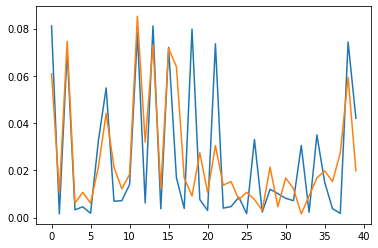

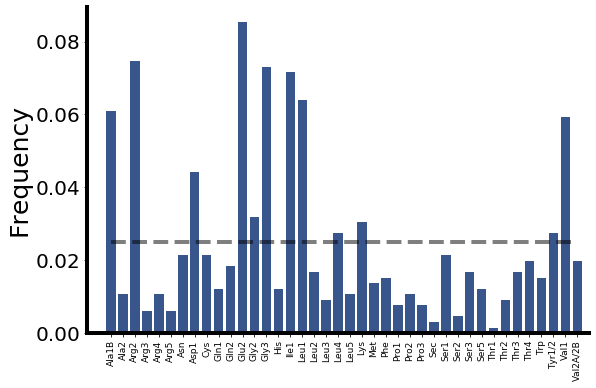

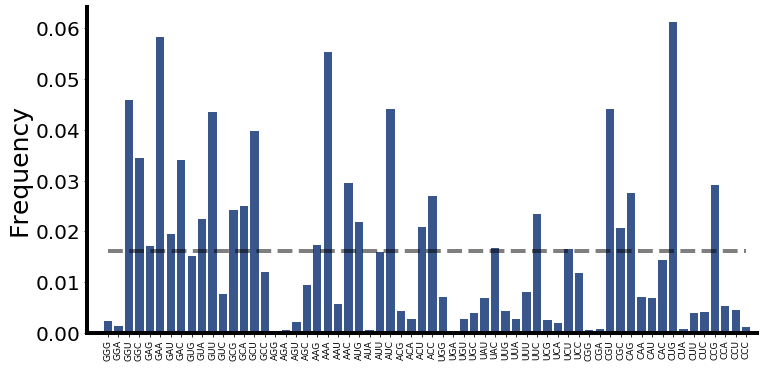

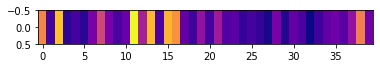

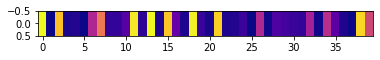

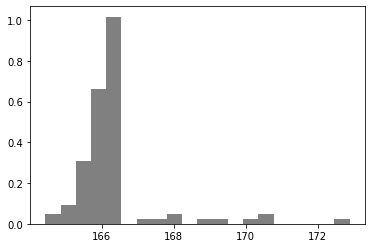

In [78]:
#plot frequency of tRNA vs. codon frequency plot for the new tRNA set vs old

gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
p_tRNA_list=np.load('RandomtRNA_FixedCodon_1500sample_p_tRNA_list.npy')
elong_t_tRNA_list=np.load('RandomtRNA_FixedCodon_1500sample_elong_t_list.npy')

tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met", "Phe", "Pro1", "Pro2", "Pro3", "Sec", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1/2", "Val1", "Val2A/2B"]

gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

print(gr25_ptRNA)
print(p_tRNA_list[np.argmin(elong_t_tRNA_list)])

plt.plot(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)])
plt.plot(np.arange(40),gr25_ptRNA)

#fig,ax0 = plt.subplots()
#ax0.bar(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)])
fig,ax0 = plt.subplots(figsize=(9,6))
ax0.bar(np.arange(40),gr25_ptRNA,color='#39568CFF',width=0.8)
ax0.plot(np.arange(40),[1/40]*40,color='black',linewidth=4,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_tags,rotation='vertical')
ax0.set_xlim(-2,40)

fig,ax = plt.subplots(figsize=(12,6))
ax.bar(np.arange(62),gr25_pCodon,color='#39568CFF',width=0.8)
ax.plot(np.arange(62),[1/62]*62,color='black',linewidth=4,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_tags,rotation='vertical')
ax.set_xlim(-2,62)
tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)
print(tRNA_dist)
print(sum(tRNA_dist))

tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)

print(min(elong_t_tRNA_list))
plt.figure()
plt.imshow(gr25_ptRNA[np.newaxis,:],aspect=4,cmap='plasma')
plt.figure()
plt.imshow(p_tRNA_list[np.argmin(elong_t_tRNA_list)][np.newaxis,:],aspect=3,cmap='plasma')

fig,ax1 = plt.subplots(1,1)
hist=ax1.hist(elong_t_tRNA_list,20,color='grey',density=True)

for ax in [ax0,ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)

## Is there a correlation betweeen tRNA and codon frequencies? If so,
## can I rationally design a steeper slope to get faster elong rate?
#

In [35]:
###### Genetic algorithm for just codon shuffling ########

def run_ga_CodonSweep(tRNA_arr,elong_arr,codon_arr,gr_dict,minRange,maxRange):
    
    #### Compute fitness
    fitness = (1/np.array(elong_arr))/sum((1/np.array(elong_arr)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[-n:]
    codon_arr=np.array(codon_arr)
    parents = codon_arr[parent_indices]

    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])

        #### Compute elong_t of the recombined children
        elong_t_0, std_0 = computedElongationLatency_gr3_v2(tRNA_arr,child_0,gr_dict);
        elong_t_1, std_1 = computedElongationLatency_gr3_v2(tRNA_arr,child_1,gr_dict);
                

        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        recombined_children_elongt.append(elong_t_0[0])
        recombined_children_elongt.append(elong_t_1[0])

    #### Have recombined children and their elong_t replaced culled candidates
    codon_arr[cull_indices] = recombined_children
    elong_arr[cull_indices] = recombined_children_elongt
    return fitness, codon_arr, elong_arr

    

In [103]:
###### Genetic algorithm for just codon shuffling ########

def run_ga_CodonSweep_multithread(tRNA_arr,elong_arr,codon_arr,gr_dict,minRange,maxRange):
    from joblib import Parallel, delayed
    import multiprocessing   
    num_cores = 16

    #### Compute fitness
    fitness = (1/np.array(elong_arr))/sum((1/np.array(elong_arr)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[-n:]
    codon_arr=np.array(codon_arr)
    parents = codon_arr[parent_indices]

    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])
        
        ### Add children to list
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        
    #### Compute elong_t of the recombined children, multithreaded
    inputs=[[tRNA_arr,recombined_children[i],gr_dict] for i in np.arange(len(couples)*2)]
    a = Parallel(n_jobs=num_cores)(delayed(computedElongationLatency_gr3_v2_multithread)(i) for i in inputs)
    for _,items in enumerate(a):
        recombined_children_elongt.append(items[0][0])
    
    #### Have recombined children and their elong_t replaced culled candidates
    codon_arr[cull_indices] = recombined_children
    elong_arr[cull_indices] = recombined_children_elongt
    return fitness, codon_arr, elong_arr

def computedElongationLatency_gr3_v2_multithread(input):
    import numpy as np
    gr25_ptRNA = input[0]
    gr25_pCodon = input[1]
    gr_dict = input[2]
    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff],[rxndiff[d][5][0] for d in rxndiff])

In [37]:
%%time
### tRNA array fixed, codon varying
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_codon_list = np.load('FixedtRNA_RandomCodon_100sample_elong_t_list.npy')
p_Codon_list = np.load('FixedtRNA_RandomCodon_100sample_p_Codon_list.npy')


fitness_arr = list()
minelong_arr = list()
for i in range(10):
    fitness, p_Codon_list, elong_t_Codon_list = run_ga_CodonSweep_multithread(gr25_ptRNA,elong_t_codon_list,p_Codon_list,gr_dict,min(gr25_pCodon),max(gr25_pCodon))
    print(max(fitness))
    print(min(elong_t_Codon_list))
    fitness_arr.append(max(fitness))
    minelong_arr.append(min(elong_t_Codon_list))
#np.save('FixedtRNA_RandomCodon_2000sample_elong_t_list',elong_t_Codon_list)
#np.save('FixedtRNA_RandomCodon_2000sample_p_tRNA_list',p_Codon_list)
#np.save('minelong_arr2-RandomCodon',minelong_arr)
#2 min 6 seconds
#33.5 seconds

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

[ 6.16066344e-03 -1.26152373e-03  1.07007802e-02 -3.42523540e-02
  7.34847800e-02  3.08215215e-01 -1.57040104e-02 -3.39970170e-02
 -1.30337290e-02 -1.83659769e-02 -4.15393695e-02 -7.66909629e-03
  9.34657779e-04 -2.46526743e-02 -3.22177739e-02 -1.18356339e-02
  2.03812235e-06 -4.40865813e-04 -2.19000488e-03 -9.33988031e-03
 -1.01710947e-02 -3.83835154e-02 -5.58371636e-03 -2.93861704e-02
 -1.59827605e-02  4.34726320e-02  1.76629691e-02 -4.38405329e-02
  3.98178919e-04 -2.61792903e-03 -2.07463273e-02 -2.68516978e-02
 -6.99403071e-03 -1.51084944e-04 -2.69912949e-03  5.97594470e-04
  2.94631996e-03 -1.62466145e-02 -3.65225707e-03 -2.75079050e-03
 -7.85717309e-03 -2.31975534e-02 -4.24449847e-04 -1.82945015e-03
 -1.59089418e-02 -1.15287119e-02 -4.67110953e-04  5.28798441e-02
 -4.37561498e-02  2.16994866e-01 -2.63055467e-02 -6.77790805e-03
 -6.18434899e-03 -1.36319309e-02 -6.12010360e-02 -7.39609299e-04
 -3.88911096e-03 -2.91978780e-04 -2.89708880e-02 -3.73371263e-03
 -4.41106117e-03 -7.86305

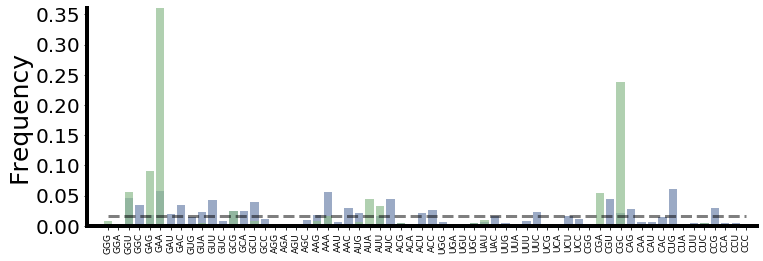

In [79]:
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
p_tRNA_list=np.load('RandomtRNA_FixedCodon_1500sample_p_tRNA_list.npy')
elong_t_tRNA_list=np.load('RandomtRNA_FixedCodon_1500sample_elong_t_list.npy')

tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met", "Phe", "Pro1", "Pro2", "Pro3", "Sec", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1/2", "Val1", "Val2A/2B"]

gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']


p_Codon_list = np.load('FixedtRNA_RandomCodon_2000sample_p_tRNA_list.npy')
elong_t_Codon_list = np.load('FixedtRNA_RandomCodon_2000sample_elong_t_list.npy')


fig,ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(62),gr25_pCodon,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(62),p_Codon_list[np.argmin(elong_t_Codon_list)],color='darkseagreen',width=0.8,alpha=0.7)
ax.plot(np.arange(62),[1/62]*62,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_tags,rotation='vertical')
ax.set_xlim(-2,62)
codon_dist = (p_Codon_list[np.argmin(elong_t_Codon_list)] - gr25_pCodon)
print(codon_dist)
print(sum(codon_dist))

tRNA_dist = (p_Codon_list[np.argmin(elong_t_tRNA_list)] - gr25_pCodon)


tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)
    ax.set_ylim(0,0.36)
    ax.set_yticks(np.arange(0,0.36,0.05))

100
[-0.00231549 -0.00120509 -0.04586655 -0.0344056  -0.01704068 -0.05826947
  0.01693488 -0.03394943  0.01169293 -0.02230834 -0.03800472  0.00458904
 -0.02421741 -0.02501112 -0.03967592  0.18249442  0.01155615  0.04423003
  0.00545471 -0.00376926 -0.01729939 -0.05541923 -0.00555733 -0.01959168
 -0.01611794  0.04611497 -0.01586392 -0.04412049 -0.00415949 -0.00216294
 -0.02076794  0.01819199 -0.00697352  0.05464066  0.00638158 -0.00377431
 -0.0066967  -0.01521686 -0.00427815  0.04376418  0.03679726 -0.01095315
  0.02269184 -0.00091303 -0.01645434  0.03683651  0.046883   -0.00067103
 -0.04412933 -0.02074683 -0.00690929  0.02812557  0.0224942   0.004934
 -0.05851643  0.04590725 -0.00037184 -0.00407853  0.01104064 -0.00265582
  0.00034195  0.0483408 ]
1.3183898417423734e-16
normed tRNA dist  1.5256803224862963


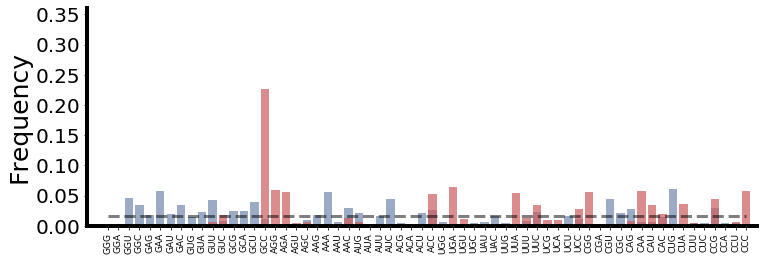

In [82]:
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met", "Phe", "Pro1", "Pro2", "Pro3", "Sec", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1/2", "Val1", "Val2A/2B"]

gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']


p_Codon_list = np.load('FixedtRNA_RandomCodon_1500sample_p_tRNA_list_slow.npy')
elong_t_Codon_list =np.load('FixedtRNA_RandomCodon_1500sample_elong_t_list_slow.npy')

print(len(elong_t_Codon_list))
fig,ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(62),gr25_pCodon,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(62),p_Codon_list[np.argmax(elong_t_Codon_list)],color='indianred',width=0.8,alpha=0.7)
ax.plot(np.arange(62),[1/62]*62,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_tags,rotation='vertical')
ax.set_xlim(-2,62)
codon_dist = (p_Codon_list[np.argmin(elong_t_Codon_list)] - gr25_pCodon)
print(codon_dist)
print(sum(codon_dist))

tRNA_dist = (p_Codon_list[np.argmin(elong_t_tRNA_list)] - gr25_pCodon)


tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)
    ax.set_ylim(0,0.36)
    ax.set_yticks(np.arange(0,0.36,0.05))

[ 1.94688918e-02 -6.38523373e-03  8.22376968e-04 -2.99875048e-05
 -3.63900900e-03  2.40490544e-03 -1.11639458e-02  1.43837056e-02
 -1.87580269e-02 -1.04256773e-02 -1.31938266e-02 -6.12665485e-03
 -2.95651679e-02  5.13938109e-04 -7.86021317e-03  4.12095560e-03
 -4.76296971e-02 -1.20494033e-02  4.71140414e-02 -1.62214553e-02
  2.28159998e-04  4.92092099e-02 -1.21910708e-02  3.42890506e-03
  8.35453113e-03  1.68364484e-03  1.29153851e-02 -2.87625954e-06
 -1.50736644e-02 -2.32266565e-04 -1.01573129e-02 -5.35040366e-03
  4.78248663e-02 -4.79860655e-04  1.45026864e-02 -1.36915577e-02
 -1.31929572e-02 -2.28860851e-02  5.25756494e-03  4.40725851e-02]
1.0408340855860843e-16
normed tRNA dist  0.5526127072105026


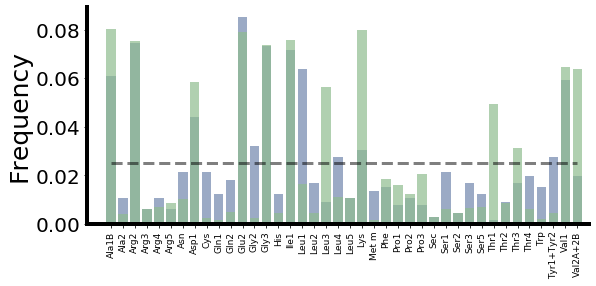

In [101]:
p_tRNA_list = np.load('RandomtRNA_FixedCodon_1500sample_p_tRNA_list2.npy')
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_1500sample_elong_t_list2.npy')
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']



fig,ax = plt.subplots(figsize=(9,4))
ax.bar(np.arange(40),gr25_ptRNA,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)],color='darkseagreen',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_tags,rotation='vertical')
ax.set_xlim(-2,40)
tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)
print(tRNA_dist)
print(sum(tRNA_dist))


tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)

[-0.05580158 -0.00561968 -0.07120558  0.05497353  0.06285722  0.00829744
 -0.01944681 -0.03863801  0.01917297  0.00824964 -0.0130762  -0.00892491
  0.03467582 -0.07023549 -0.00159409 -0.06432673 -0.04343517 -0.00911023
 -0.00579376  0.06039773  0.00630406 -0.02972932 -0.00765281 -0.01072193
  0.06955864  0.05922105 -0.00681348  0.0741758  -0.01088883  0.05372121
 -0.01036441 -0.00125622  0.00321737  0.06737674 -0.01086352 -0.0125589
  0.01691798 -0.0164608  -0.0568369  -0.01776186]
6.938893903907228e-17
normed tRNA dist  1.1982343997083622


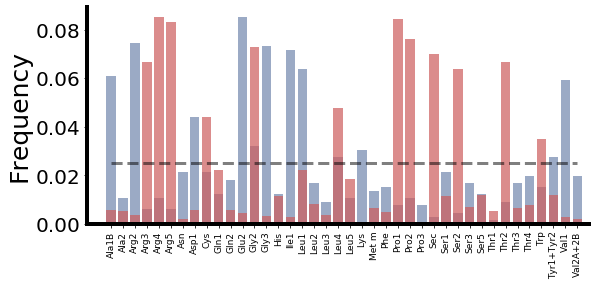

In [81]:
p_tRNA_list = np.load('Slower_RandomtRNA_FixedCodon_1500sample_p_tRNA_list2.npy')
elong_t_tRNA_list = np.load('Slower_RandomtRNA_FixedCodon_1500sample_elong_t_list2.npy')
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']


fig,ax = plt.subplots(figsize=(9,4))
ax.bar(np.arange(40),gr25_ptRNA,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),p_tRNA_list[np.argmax(elong_t_tRNA_list)],color='indianred',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_tags,rotation='vertical')
ax.set_xlim(-2,40)
tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)
print(tRNA_dist)
print(sum(tRNA_dist))

tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)


In [92]:
###### Genetic algorithm for tRNA &  codon shuffling ########

def run_ga_tRNACodonSweep(combined_arr,elong_arr,gr_dict,minRangetRNA,maxRangetRNA,minRangeCodon,maxRangeCodon):
    
    #### Compute fitness
    fitness = (1/np.array(elong_arr))/sum((1/np.array(elong_arr)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[-n:]
    combined_arr=np.array(combined_arr)
    parents = combined_arr[parent_indices]
    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(np.arange(40),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRangetRNA,maxRangetRNA,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRangetRNA,maxRangetRNA,mutation_num)
        
        recombination_locs = np.random.choice(np.arange(40,102),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRangeCodon,maxRangeCodon,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRangeCodon,maxRangeCodon,mutation_num)
        
        child_0 = np.zeros(len(couple[0]))
        child_1 = np.zeros(len(couple[0]))

        ### Re-normalize each recombined children
        child_0[0:40] = couple[0][0:40]/np.sum(couple[0][0:40])
        child_1[0:40] = couple[1][0:40]/np.sum(couple[1][0:40])

        child_0[40:102] = couple[0][40:102]/np.sum(couple[0][40:102])
        child_1[40:102] = couple[1][40:102]/np.sum(couple[1][40:102])

        #### Compute elong_t of the recombined children
        elong_t_0, std_0 = computedElongationLatency_gr3_v2(child_0[0:40],child_0[40:102],gr_dict);
        elong_t_1, std_1 = computedElongationLatency_gr3_v2(child_1[0:40],child_1[40:102],gr_dict);
                

        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        recombined_children_elongt.append(elong_t_0[0])
        recombined_children_elongt.append(elong_t_1[0])

    #### Have recombined children and their elong_t replaced culled candidates
    combined_arr[cull_indices] = recombined_children
    elong_arr[cull_indices] = recombined_children_elongt
    return fitness, combined_arr, elong_arr

In [99]:
###### Genetic algorithm for tRNA &  codon shuffling ########

def run_ga_tRNACodonSweep_multithread(combined_arr,elong_arr,gr_dict,minRangetRNA,maxRangetRNA,minRangeCodon,maxRangeCodon):
    from joblib import Parallel, delayed
    import multiprocessing   
    num_cores = 16


    #### Compute fitness
    fitness = (1/np.array(elong_arr))/sum((1/np.array(elong_arr)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[-n:]
    combined_arr=np.array(combined_arr)
    parents = combined_arr[parent_indices]
    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(np.arange(40),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRangetRNA,maxRangetRNA,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRangetRNA,maxRangetRNA,mutation_num)
        
        recombination_locs = np.random.choice(np.arange(40,102),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRangeCodon,maxRangeCodon,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRangeCodon,maxRangeCodon,mutation_num)
        
        child_0 = np.zeros(len(couple[0]))
        child_1 = np.zeros(len(couple[0]))

        ### Re-normalize each recombined children
        child_0[0:40] = couple[0][0:40]/np.sum(couple[0][0:40])
        child_1[0:40] = couple[1][0:40]/np.sum(couple[1][0:40])

        child_0[40:102] = couple[0][40:102]/np.sum(couple[0][40:102])
        child_1[40:102] = couple[1][40:102]/np.sum(couple[1][40:102])
        
        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
    
    
    #### Compute elong_t of the recombined children, multithreaded
    inputs=[[recombined_children[i][0:40],recombined_children[i][40:102],gr_dict] for i in np.arange(len(couples)*2)]
    a = Parallel(n_jobs=num_cores,backend='loky')(delayed(computedElongationLatency_gr3_v2_multithread)(i) for i in inputs)
    for _,items in enumerate(a):
        recombined_children_elongt.append(items[0][0])

    #### Have recombined children and their elong_t replaced culled candidates
    combined_arr[cull_indices] = recombined_children
    elong_arr[cull_indices] = recombined_children_elongt
    return fitness, combined_arr, elong_arr

def computedElongationLatency_gr3_v2_multithread(input):
    import numpy as np
    gr25_ptRNA = input[0]
    gr25_pCodon = input[1]
    gr_dict = input[2]
    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff],[rxndiff[d][5][0] for d in rxndiff])

In [100]:
### tRNA varying codon varying
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_codon_list = np.load('FixedtRNA_RandomCodon_100sample_elong_t_list.npy')
p_Codon_list = np.load('FixedtRNA_RandomCodon_100sample_p_Codon_list.npy')

elong_arr = np.load('RandomtRNA_RandomCodon_100sample_elong_t_list.npy')
p_Codon_list = np.load('RandomtRNA_RandomCodon_100sample_p_Codon_list.npy')
p_tRNA_list = np.load('RandomtRNA_RandomCodon_100sample_p_tRNA_list.npy')

combined_arr = [np.append(p_tRNA_list[i], p_Codon_list[i]) for i in np.arange(len(p_tRNA_list))]
fitness_arr = list()
minelong_arr = list()
for i in range(1500):
    fitness, combined_arr, elong_arr = run_ga_tRNACodonSweep_multithread(combined_arr,elong_arr,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA),min(gr25_pCodon),max(gr25_pCodon))
    print(max(fitness))
    print(min(elong_arr))
    fitness_arr.append(max(fitness))
    minelong_arr.append(min(elong_arr))
    if i%250==0:
        np.save('RandomtRNA_RandomCodon_1500sample_elong_t_list',elong_arr)
        np.save('RandomtRNA_RandomCodon_1500sample_p_tRNA_list',combined_arr)
        np.save('minelong_arr2-RandomtRNARandomCodon_1500sample',minelong_arr)
np.save('RandomtRNA_RandomCodon_1500sample_elong_t_list',elong_arr)
np.save('RandomtRNA_RandomCodon_1500sample_p_tRNA_list',combined_arr)
np.save('minelong_arr2-RandomtRNARandomCodon_1500sample',minelong_arr)

0.010340239371996478
204.00086933795282
0.010306917647629572
204.00086933795282
0.010285138313349795
204.00086933795282
0.010264177744236182
159.75017737539113
0.013056957636147544
159.75017737539113
0.013054426125858885
159.75017737539113
0.013025472752827099
159.75017737539113
0.0130089555057471
159.75017737539113
0.0129633610595469
159.75017737539113
0.012947003888536474
159.75017737539113
0.012942550869888065
159.75017737539113
0.012897390915737888
159.75017737539113
0.01288687705670321
159.75017737539113
0.012844741533051327
159.75017737539113
0.012902323852385489
159.75017737539113
0.012807081308127783
159.75017737539113
0.01276527041570421
159.75017737539113
0.012737837131434029
159.75017737539113
0.01273022057078227
159.75017737539113
0.012672244768644913
159.75017737539113
0.012654173079685459
159.75017737539113
0.012634318708642116
159.75017737539113
0.012583976285428337
159.75017737539113
0.012558377392969009
159.75017737539113
0.012487934386271384
159.75017737539113
0.01245

0.010724198357482518
144.00949830111745
0.010730515677324245
144.00949830111745
0.010724397527096618
144.00949830111745
0.010745969683419647
144.00949830111745
0.010738960634295094
142.73178622360203
0.010798959882189573
142.73178622360203
0.010837663187556062
142.73178622360203
0.010829467735602744
142.73178622360203
0.0108248388009711
142.73178622360203
0.010806456974281578
142.73178622360203
0.010803848454539315
142.73178622360203
0.010802900919899628
142.73178622360203
0.01079685467714318
142.73178622360203
0.010809147222700544
142.73178622360203
0.010789552250837007
142.73178622360203
0.010783394863403944
142.73178622360203
0.010780718272367077
142.73178622360203
0.010753762107447452
142.73178622360203
0.010783864960942281
142.73178622360203
0.010742839364162749
142.73178622360203
0.010763163830708817
142.73178622360203
0.010773698640442182
142.73178622360203
0.010731928014527015
142.73178622360203
0.010771586716373878
142.73178622360203
0.010737682101686003
142.73178622360203
0.0

0.010631536837904963
140.69832003231556
0.010608947698387956
140.69832003231556
0.010587049284077842
140.69832003231556
0.010606043514119841
140.69832003231556
0.010598478413081947
140.69832003231556
0.010603916698009325
140.69832003231556
0.010593620885844337
140.69832003231556
0.010657570880783524
140.69832003231556
0.0105931824582172
140.69832003231556
0.010580726778257374
140.69832003231556
0.010594422108567328
140.69832003231556
0.010571071480512142
140.69832003231556
0.010584765130986142
140.69832003231556
0.01057675165739718
140.69832003231556
0.010590527108686517
140.69832003231556
0.010555527057071442
140.69832003231556
0.010573223431294416
140.69832003231556
0.01058208857031841
140.69832003231556
0.010544225356844138
140.69832003231556
0.010552662481086366
140.69832003231556
0.010607401435273802
140.69832003231556
0.010563979371383309
140.69832003231556
0.010562540086093936
140.69832003231556
0.0105933456766863
140.69832003231556
0.010611200090597156
140.69832003231556
0.0105

0.010720236158210309
137.39506517850973
0.010724930146709177
137.39506517850973
0.010713000546411488
137.39506517850973
0.010786626016070968
137.39506517850973
0.01072115592360625
137.39506517850973
0.01069893197127603
137.39506517850973
0.010719849094533022
137.39506517850973
0.010727629582292873
137.39506517850973
0.010735207116248357
137.39506517850973
0.010731493314637826
137.39506517850973
0.010726604730986668
137.39506517850973
0.010705386775000748
137.39506517850973
0.010704853707201296
137.39506517850973
0.010756184346290611
137.39506517850973
0.010711051917042507
137.39506517850973
0.010719780738681836
137.39506517850973
0.010683625059968112
137.39506517850973
0.010743902962146298
137.39506517850973
0.010756028521819045
137.39506517850973
0.010724075690650425
137.39506517850973
0.010730819706639628
137.39506517850973
0.010728953568533534
137.39506517850973
0.010696808163132662
137.39506517850973
0.010729241772637165
137.39506517850973
0.01070775830232396
137.39506517850973
0.0

0.010650298513229852
137.39506517850973
0.010623346180370693
137.39506517850973
0.010634284004011906
137.39506517850973
0.01059626270410033
137.39506517850973
0.01064469831135774
137.39506517850973
0.01059303976743791
137.39506517850973
0.010632122881434449
137.39506517850973
0.010601579697553485
137.39506517850973
0.010640782859824446
137.39506517850973
0.010613204092174153
137.39506517850973
0.010612136441250619
137.39506517850973
0.010619943382278164
137.39506517850973
0.010627419277831349
137.39506517850973
0.010618162914964702
137.39506517850973
0.010592641185437318
137.39506517850973
0.010611496548386504
137.39506517850973
0.01059815676013015
137.39506517850973
0.010619286767759124
137.39506517850973
0.010643424732651624
137.39506517850973
0.010627047778590666
137.39506517850973
0.010625202928193892
137.39506517850973
0.010611063742360689
137.39506517850973
0.010608934592289824
137.39506517850973
0.010618454253678657
137.39506517850973
0.010612961995019456
137.39506517850973
0.01

0.010561868724586298
137.39506517850973
0.010595367489543518
137.39506517850973
0.010584158458060442
137.39506517850973
0.010587917806105306
137.39506517850973
0.010555793269680116
137.39506517850973
0.01055994303293578
137.39506517850973
0.010626644079346157
137.39506517850973
0.01059453188615388
137.39506517850973
0.010612433015944358
137.39506517850973
0.010563680706967527
137.39506517850973
0.010574418403714807
137.39506517850973
0.010580606671050374
137.39506517850973
0.010604019533250422
137.39506517850973
0.010562525787408978
137.39506517850973
0.01055327214466157
137.39506517850973
0.010576875894855791
137.39506517850973
0.01056570466242676
137.39506517850973
0.010564542613716836
137.39506517850973
0.010561668115121119
137.39506517850973
0.010543733984917312
137.39506517850973
0.010560049705999643
137.39506517850973
0.010590208027811717
137.39506517850973
0.010556204808630312
137.39506517850973
0.010605302378916019
137.39506517850973
0.010575031262071734
137.39506517850973
0.01

0.010598524376264655
136.36503032878682
0.010587262870946973
136.36503032878682
0.010594011270471654
136.36503032878682
0.010579781642078274
136.36503032878682
0.010611649500656713
136.36503032878682
0.010591607460815477
136.36503032878682
0.01060415697100035
136.36503032878682
0.010589208543416532
136.36503032878682
0.010618092010896491
136.36503032878682
0.010596083592600244
136.36503032878682
0.01057319981778107
136.36503032878682
0.010629483350080442
136.36503032878682
0.01057309483782595
136.36503032878682
0.010598757979569051
136.36503032878682
0.010599265778776781
136.36503032878682
0.010556070155445832
136.36503032878682
0.010624486766650438
136.36503032878682
0.01061043616280219
136.36503032878682
0.010575997011119423
136.36503032878682
0.010586036096225694
136.36503032878682
0.010583902950767965
136.36503032878682
0.010581257619649242
136.36503032878682
0.010577068577959058
136.36503032878682
0.010563123076338289
136.36503032878682
0.010627628755123117
136.36503032878682
0.01

0.010550931901025155
136.36503032878682
0.010556819150966224
136.36503032878682
0.01053699772615862
136.36503032878682
0.010512815141496915
136.36503032878682
0.01060545351745762
136.36503032878682
0.010603435306150743
136.36503032878682
0.01055648919737656
136.36503032878682
0.010552380310042256
136.36503032878682
0.010570151398066859
136.36503032878682
0.010526716127546094
136.36503032878682
0.010537726422230682
136.36503032878682
0.01057744696691494
136.36503032878682
0.010550703429047426
136.36503032878682
0.01055742177616014
136.36503032878682
0.010557697459221527
136.36503032878682
0.010551590385574171
136.36503032878682
0.010544678192182647
136.36503032878682
0.010550305588843187
136.36503032878682
0.010551167483320278
136.36503032878682
0.010546617384728594
136.36503032878682
0.010535119505423123
136.36503032878682
0.010544381318864333
136.36503032878682
0.01054966350298233
136.36503032878682
0.010538217942346105
136.36503032878682
0.010556918673697945
136.36503032878682
0.0105

R^2 0.4232403135634091
1.0015378565230553


(0, 0.12)

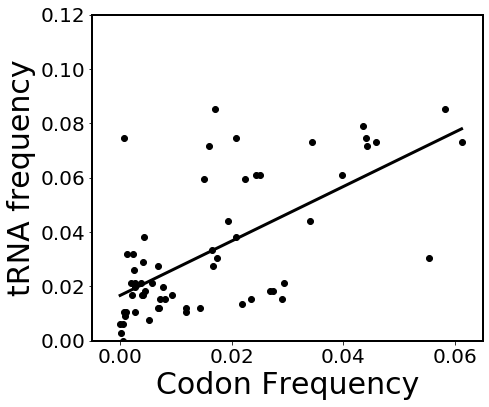

In [584]:
#### trna frequency vs codon frequency, baseline
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)


ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(gr25_ptRNA,gr25_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.set_ylim(0,0.12)

R^2 0.4535735141207978
1.4815153405113408


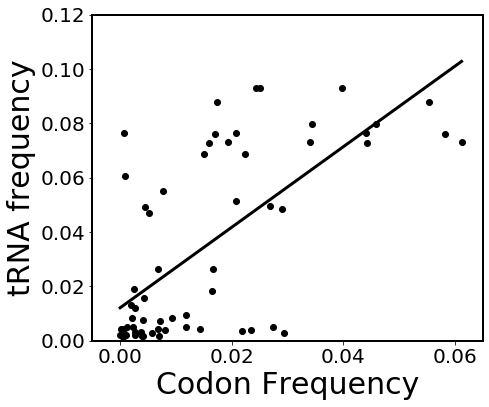

In [596]:
#### trna frequency vs codon frequency, ga faster (tRNA random, codon fixed)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

p_tRNA_list = np.load('RandomtRNA_FixedCodon_1500sample_p_tRNA_list2.npy')
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_1500sample_elong_t_list2.npy')

ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(p_tRNA_list[np.argmin(elong_t_tRNA_list)],gr25_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)


ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

R^2 0.21001698725771456
0.20174522421212648


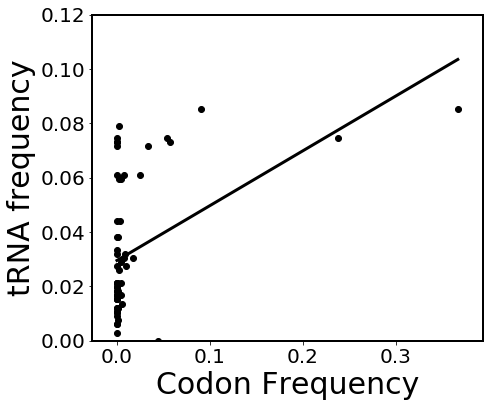

In [582]:
#### trna frequency vs codon frequency, ga faster, tRNA fixed, codon random
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

p_Codon_list = np.load('FixedtRNA_RandomCodon_2000sample_p_tRNA_list.npy')
elong_t_Codon_list = np.load('FixedtRNA_RandomCodon_2000sample_elong_t_list.npy')

gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(gr25_ptRNA,p_Codon_list[np.argmin(elong_t_Codon_list)],True)


codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
#ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

R^2 0.06487517128003639
0.2685521347820137


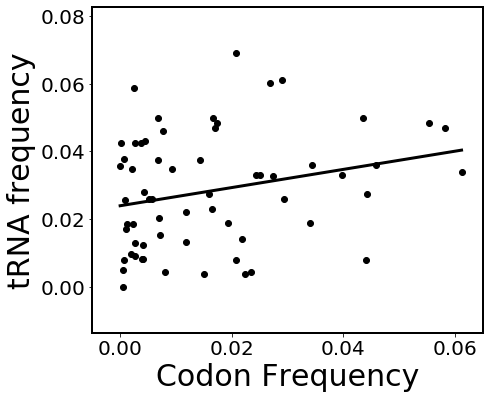

In [451]:
#### trna frequency vs codon frequency, ga faster (trna uniform, codon WT)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
ptRNA_uniform = np.random.uniform(min(gr25_ptRNA),max(gr25_ptRNA),len(gr25_ptRNA))



ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(ptRNA_uniform,gr25_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)


ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)


R^2 0.00013592761235281525
0.021452788246971444


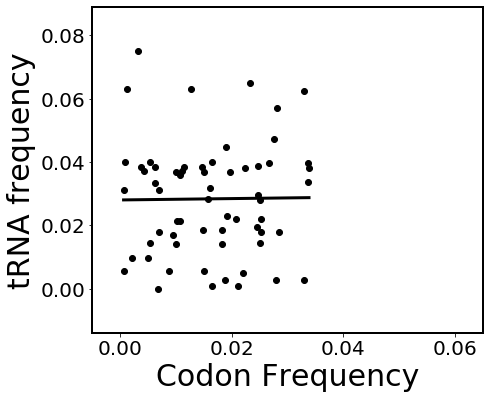

In [616]:
#### trna frequency vs codon frequency, ga faster (trna uniform, codon WT)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
ptRNA_uniform = np.random.uniform(min(gr25_ptRNA),max(gr25_ptRNA),len(gr25_ptRNA))
pCodon_uniform = np.random.uniform(min(gr25_pCodon),max(gr25_pCodon),len(gr25_pCodon))

ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(ptRNA_uniform,pCodon_uniform,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)


ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)





0.13885178785912666
R^2 0.34642282756042786
0.7245587537199599


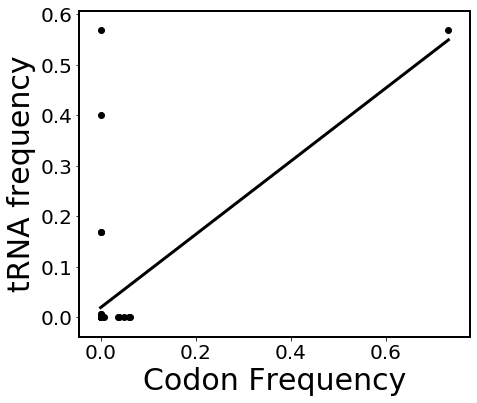

In [91]:
#### trna frequency vs codon frequency, ga faster, tRNA random, codon random
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#np.save('',elong_t_Codon_list)
#np.save('',p_Codon_list)




p_Codon_list = np.load('RandomtRNA_RandomCodon_1500sample_p_tRNA_list.npy')
elong_t_Codon_list = np.load('RandomtRNA_RandomCodon_1500sample_elong_t_list.npy')


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(p_Codon_list[np.argmin(elong_t_Codon_list)][0:40],p_Codon_list[np.argmin(elong_t_Codon_list)][40:102],True)


codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
#ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)


ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

R^2 0.0914894252922398
-0.19763959620215285


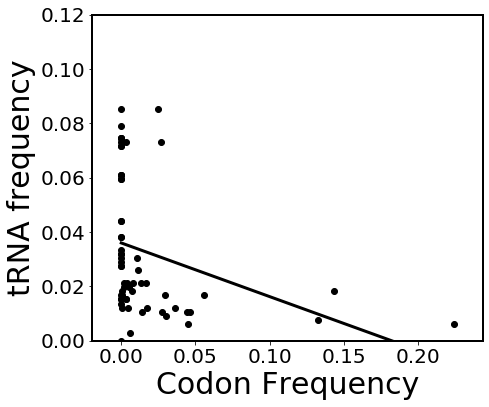

In [102]:
#### trna frequency vs codon frequency, ga faster, tRNA fixed, codon random
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

p_Codon_list = np.load('FixedtRNA_RandomCodon_1500sample_p_tRNA_list_slow.npy')
elong_t_Codon_list = np.load('FixedtRNA_RandomCodon_1500sample_elong_t_list_slow.npy')

gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(gr25_ptRNA,p_Codon_list[np.argmin(elong_t_Codon_list)],True)


codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
#ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

In [300]:
#np.save('RandomtRNA_RandomCodon_10ksample_p_Codon_tRNA_list',p_Codon_tRNA_list)
#np.save('RandomtRNA_RandomCodon_10ksample_elong_t_list',elong_t_list_codon_tRNA_distrib)

#np.save('FixedtRNA_RandomCodon_10ksample_p_Codon_tRNA_list',p_Codon_list)
#np.save('FixedtRNA_RandomCodon_10ksample_elong_t_list',elong_t_list_codon_distrib)

#np.save('RandomtRNA_FixedCodon_10ksample_p_Codon_tRNA_list',p_tRNA_list)
#np.save('RandomtRNA_FixedCodon_10ksample_elong_t_list',elong_t_tRNA_list)


#np.save('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list',p_tRNA_list)
#np.save('RandomtRNA_FixedCodon_100sample_elong_t_list',elong_t_tRNA_list)


In [7]:
%%time
### Codon array fixed
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_elong_t_list.npy')
p_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list.npy')


fitness_arr = list()
minelong_arr = list()
for i in range(1500):
    fitness, p_tRNA_list, elong_t_tRNA_list = run_ga_tRNASweep_multithread(gr25_Codon,np.array([186.4]*100),[gr25_ptRNA]*100,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA))
    print(max(fitness))
    print(min(elong_t_tRNA_list))
    fitness_arr.append(max(fitness))
    minelong_arr.append(min(elong_t_tRNA_list))
np.save('WTtRNA_FixedCodon_1500sample_elong_t_list2',elong_t_tRNA_list)
np.save('WTtRNA_FixedCodon_1500sample_p_tRNA_list2',p_tRNA_list)
np.save('minelong_arr2-tRNA-WTstarting',minelong_arr)

0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
183.89438507762537
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.07933210131068
0.009999999999999997
186.4
0.009999999999999997
185.35527124146734
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.4844946282085
0.009999999999999997
186.4
0.009999999999999997
183.393469

0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.18023106812004
0.009999999999999997
185.52999979551478
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.5232460002816
0.009999999999999997
186.4
0.009999999999999997
185.49559687462192
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.00

0.009999999999999997
185.0676713233892
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
184.3775871542217
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.06472616911427
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.2483595229199
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
184.67854575796957
0.009999999999999997
185.326915937933
0.009999999999999997
186.4
0.009999999999999997
186.4
0.0099999

0.009999999999999997
186.15051953681942
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
183.52754997380686
0.009999999999999997
185.25715791580217
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
184.61857080612975
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.0

0.009999999999999997
186.4
0.009999999999999997
184.89940239155453
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.02408711655846
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
184.0053552542865
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999

0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
184.20691850706208
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.9607487989608
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.58298054181628
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.59928408004546
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.5397041088868
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.83032942231569
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.0099